# **Dataset Exploration and Graph Construction**

## **1. Introduction**
### This Colab notebook explores ego networks using the provided dataset.
### The dataset includes several files representing the structure and features of a social network.
### Key objectives include loading the data, creating a graph, and analyzing network properties.


In [ ]:
!pip install --upgrade networkx


## **2. Environment Setup**

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import glob
from scipy.linalg import eigh

# Enable inline plotting for visualizations
%matplotlib inline

## **3. Loading the Dataset**

In [ ]:
# Function to read edges from a file
def load_edges_from_file(file_path):
    edge_list = []
    with open(file_path, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            edge_list.append((int(nodes[0]), int(nodes[1])))
    return edge_list

# Function to read features from a file
def load_node_features(file_path):
    node_features = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            node_id = int(parts[0])  # First value is the node ID
            feature_vector = np.array(list(map(int, parts[1:])))  # The rest are features
            node_features[node_id] = feature_vector
    return node_features

# Gaussian kernel similarity function
def compute_gaussian_similarity(vector_a, vector_b, sigma=1.0):
    difference = vector_a - vector_b
    squared_distance = np.dot(difference, difference)  # Squared Euclidean distance
    return np.exp(-sigma * squared_distance)

# Create a weighted adjacency matrix using Gaussian kernel weights
def generate_weighted_adjacency_matrix(edges, node_features, node_to_index_mapping, sigma=1.0):
    num_nodes = len(node_to_index_mapping)
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=float)

    for node_a, node_b in edges:
        index_a, index_b = node_to_index_mapping[node_a], node_to_index_mapping[node_b]
        weight = compute_gaussian_similarity(node_features[node_a], node_features[node_b], sigma)
        adjacency_matrix[index_a, index_b] = weight
        adjacency_matrix[index_b, index_a] = weight  # Since the graph is undirected

    return adjacency_matrix

# Create degree matrix from the adjacency matrix
def generate_degree_matrix(adjacency_matrix):
    node_degrees = np.sum(adjacency_matrix, axis=1)  # Sum weights in each row
    degree_matrix = np.diag(node_degrees)  # Create a diagonal matrix of node degrees
    return degree_matrix

# Create Laplacian matrix from adjacency and degree matrices
def generate_laplacian_matrix(adjacency_matrix, degree_matrix):
    return degree_matrix - adjacency_matrix

# Analyze the Laplacian matrix by computing and sorting its eigenvalues and eigenvectors
def compute_laplacian_eigenvalues_and_vectors(laplacian_matrix):
    eigenvalues, eigenvectors = eigh(laplacian_matrix)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues[:100], sorted_eigenvectors


In [ ]:

# Main execution
central_node_id = 0

current_directory = os.getcwd()
edges_file_path = os.path.join(current_directory, "dataset", f"{central_node_id}.edges")
features_file_path = os.path.join(current_directory, "dataset", f"{central_node_id}.feat")

# Load edges and node features
edges_list = load_edges_from_file(edges_file_path)
node_features_dict = load_node_features(features_file_path)

# Map original node IDs to contiguous indices
node_ids = list(node_features_dict.keys())


## **4. Visualizing the Combined Graph**

In [ ]:
node_index_mapping = {node_id: index for index, node_id in enumerate(node_ids)}

# Output information
total_nodes = len(node_ids)
print(f"Total number of nodes: {total_nodes}")
print(f"Number of features for each node: {len(next(iter(node_features_dict.values())))}")


Total number of nodes: 347
Number of features for each node: 224


In [ ]:
print(node_index_mapping)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119, 121: 120, 122: 12

In [ ]:
# Combine all graphs into a single graph (optional)
combined_graph = nx.compose_all(graphs)

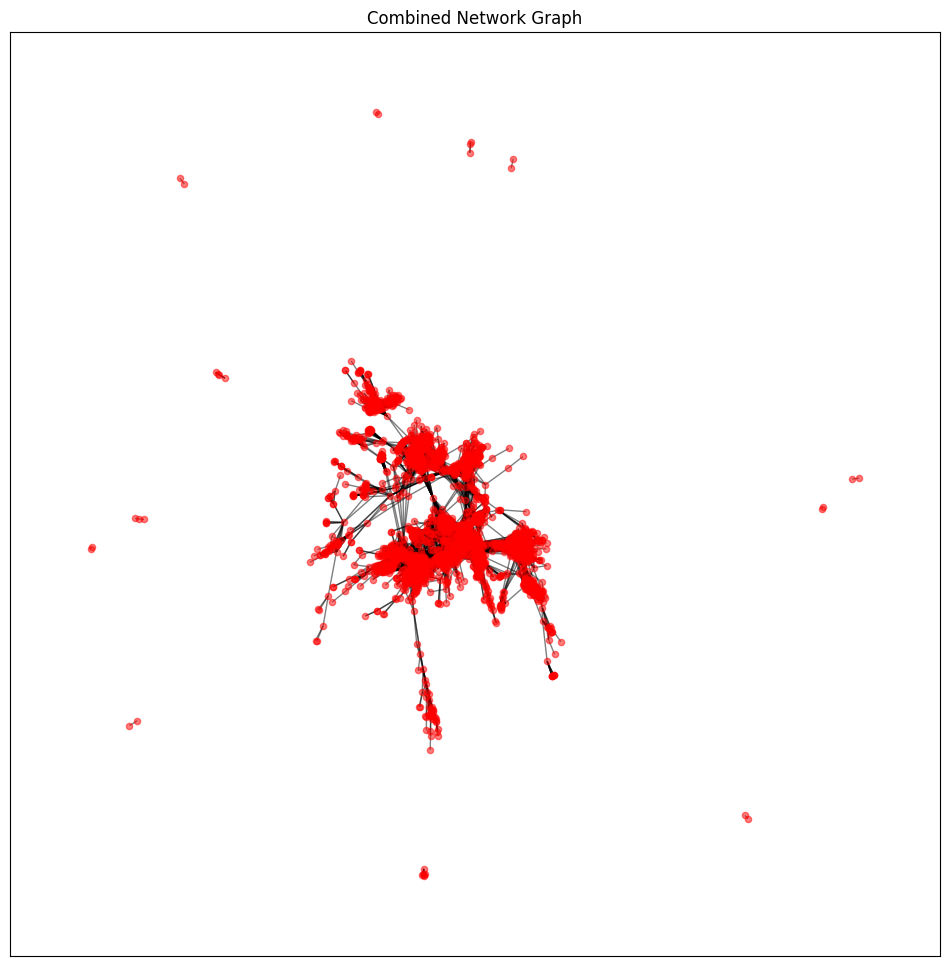

In [ ]:
# Visualize the combined graph with improved layout
plt.figure(figsize=(12, 12))

# Use spring layout for better spacing
pos = nx.spring_layout(combined_graph, seed=42)

# Draw nodes and edges with customization
nx.draw_networkx_nodes(combined_graph, pos, node_size=20, node_color="red", alpha=0.5)
nx.draw_networkx_edges(combined_graph, pos, edge_color="black", alpha=0.5)

plt.title("Combined Network Graph")
plt.show()


# **Applying Spectral Clustering**

## **1. Calculating the Adjacency, Degree, and Laplacian Matrix**

In [ ]:
# Create the weighted adjacency matrix
adjacency_matrix = generate_weighted_adjacency_matrix(edges_list, node_features_dict, node_index_mapping, sigma=0.1)

# Generate the degree and Laplacian matrices
degree_matrix = generate_degree_matrix(adjacency_matrix)
laplacian_matrix = generate_laplacian_matrix(adjacency_matrix, degree_matrix)

print(f"Dimensions of the Laplacian matrix: {len(laplacian_matrix)} x {len(laplacian_matrix[0])}")

# Compute eigenvalues and eigenvectors
sorted_eigenvalues, sorted_eigenvectors = compute_laplacian_eigenvalues_and_vectors(laplacian_matrix)

# Example output
print("First 5 Eigenvalues:", sorted_eigenvalues[:5])
print(f"Eigenvector shape: {len(sorted_eigenvectors)} x {len(sorted_eigenvectors[0])}")


Dimensions of the Laplacian matrix: 347 x 347
First 5 Eigenvalues: [-4.04675077e-15 -1.78271156e-15 -6.00869034e-16 -5.25750027e-16
 -3.18674121e-16]
Eigenvector shape: 347 x 347


In [ ]:
if np.array_equal(laplacian_matrix, laplacian_matrix.T):
    print("The matrix A is symmetric.")
else:
    print("The matrix A is not symmetric.")

The matrix A is symmetric.


## **2. Clustering with k-means (using Eigenvectors)**

Largest Eigenvalue Gap: 0.060964118313351134
Index of Largest Gap: 63


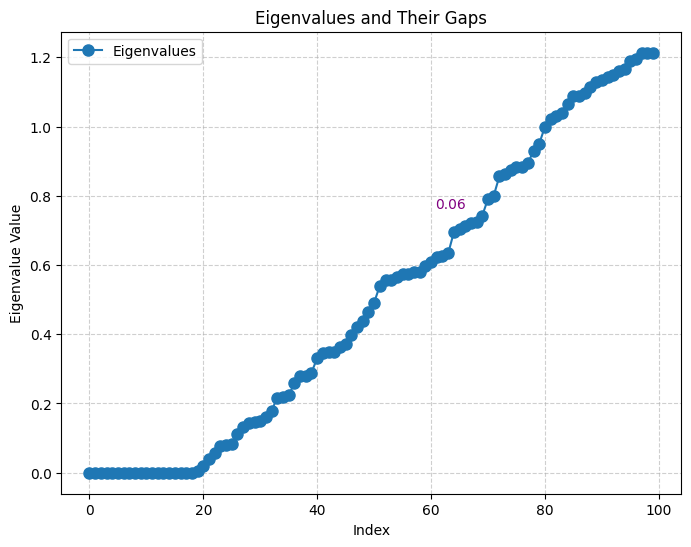

In [ ]:
# # Step 2: Compute the differences between consecutive eigenvalues (gaps)
# eigenvalue_gaps = np.diff(sorted_eigenvalues)

# # Step 3: Identify the largest eigenvalue gap and its index
# max_gap = np.max(eigenvalue_gaps)
# gap_position = np.argmax(eigenvalue_gaps)

# #print("Eigenvalue Gaps:", eigenvalue_gaps)
# print("Largest Eigenvalue Gap:", max_gap)
# print("Index of Largest Gap:", gap_position)

# # Plot the eigenvalues and gaps
# plt.figure(figsize=(8, 6))

# # Plot eigenvalues as points
# plt.plot(sorted_eigenvalues, 'o-', label="Eigenvalues", markersize=8)

# # Annotate the largest gap
# for i in range(len(eigenvalue_gaps)):
#     x_position = i + 0.5  # Position between two eigenvalues
#     y_position = (sorted_eigenvalues[i] + sorted_eigenvalues[i + 1]) / 2  # Midpoint for the text
#     if eigenvalue_gaps[i] == max_gap:
#         plt.annotate(f"{eigenvalue_gaps[i]:.2f}", xy=(x_position, y_position), xytext=(x_position, y_position + 0.1), ha="center", color="purple")

# # Enhance plot for better readability
# plt.title("Eigenvalues and Their Gaps")
# plt.xlabel("Index")
# plt.ylabel("Eigenvalue Value")
# plt.grid(True, linestyle="--", alpha=0.7)
# plt.legend()
# plt.show()


# Step 2: Compute the gaps between consecutive eigenvalues (eigenvalue differences)
eigenvalue_differences = np.diff(sorted_eigenvalues)

# Step 3: Identify the largest eigenvalue gap and its index
max_eigenvalue_gap = np.max(eigenvalue_differences)
max_gap_index = np.argmax(eigenvalue_differences)

#print("Eigenvalue Differences:", eigenvalue_differences)
print("Largest Eigenvalue Gap:", max_eigenvalue_gap)
print("Index of Largest Gap:", max_gap_index)

# Plot the eigenvalues and the gaps
plt.figure(figsize=(8, 6))

# Plot eigenvalues as points
plt.plot(sorted_eigenvalues, 'o-', label="Eigenvalues", markersize=8)

# Annotate the largest gap
for i in range(len(eigenvalue_differences)):
    x_position = i + 0.5  # Position between two eigenvalues
    y_position = (sorted_eigenvalues[i] + sorted_eigenvalues[i + 1]) / 2  # Midpoint for the text
    if eigenvalue_differences[i] == max_eigenvalue_gap:
        plt.annotate(f"{eigenvalue_differences[i]:.2f}", xy=(x_position, y_position), xytext=(x_position, y_position + 0.1), ha="center", color="purple")

# Enhance plot for better readability
plt.title("Eigenvalues and Their Gaps")
plt.xlabel("Index")
plt.ylabel("Eigenvalue Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [ ]:
# Select the eigenvectors corresponding to the smallest k eigenvalues
k = max_gap_index
selected_eigenvectors = sorted_eigenvectors[:, :k]

print(f"Shape of selected eigenvectors: {len(selected_eigenvectors)} x {len(selected_eigenvectors[0])}")


Shape of selected eigenvectors: 347 x 63


In [ ]:

from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(selected_eigenvectors)
cluster_labels = kmeans_model.labels_

## **3. Visualizing the Clustering Results**

In [ ]:
# import matplotlib.pyplot as plt
# import networkx as nx
# import numpy as np

# def visualize_with_central_node(node_ids, edges, node_index_mapping, central_node_id, cluster_labels):
#     # Create the graph
#     graph = nx.Graph()

#     # Ensure the edges are in the correct format (list of tuples)
#     edges_list = [(edge[0], edge[1]) for edge in edges]  # Ensure each edge is a tuple (node1, node2)

#     # Add edges to the graph
#     graph.add_edges_from(edges_list)

#     # Add isolated nodes to the graph (those with no edges)
#     isolated_nodes = set(node_ids) - set(graph.nodes)
#     graph.add_nodes_from(isolated_nodes)

#     # Add a central node and connect it to all other nodes
#     central_node_str = str(central_node_id)
#     graph.add_node(central_node_str)

#     # Ensure that all nodes are included in the node_index_mapping
#     for node in graph.nodes:
#         if node not in node_index_mapping:
#             node_index_mapping[node] = len(node_index_mapping)

#     # Ensure there are enough cluster labels to match the number of nodes in the graph
#     # Extend the cluster labels if there are not enough labels
#     num_nodes = len(graph.nodes)
#     if len(cluster_labels) < num_nodes:
#         additional_labels_needed = num_nodes - len(cluster_labels)
#         cluster_labels = np.append(cluster_labels, np.full(additional_labels_needed, 0))  # Use default label

#     # Ensure the graph nodes and node colors are aligned
#     node_color_labels = [cluster_labels[node_index_mapping[node]] for node in graph.nodes]

#     # Add edges from central node to all other nodes
#     for node in node_ids:
#         graph.add_edge(central_node_str, node)

#     # Visualization
#     plt.figure(figsize=(10, 8))
#     positions = nx.spring_layout(graph, seed=42)

#     # Adjust node size to make the central node bigger
#     node_sizes = [500 if node == central_node_str else 100 for node in graph.nodes]

#     # Draw the graph with node colors based on the clusters
#     nx.draw(graph, positions, with_labels=True, node_color=node_color_labels, cmap=plt.cm.get_cmap("tab10", len(set(node_color_labels))),
#             node_size=node_sizes, font_size=10, font_weight='bold')

#     plt.title("Graph Visualization with K-Means Clustering and Central Node")
#     plt.show()

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans

def visualize_clustered_graph(node_ids, edges, num_clusters=5):
    # Create the graph
    graph = nx.Graph()

    # Add edges to the graph
    graph.add_edges_from(edges)

    # Add isolated nodes (nodes with no edges)
    isolated_nodes = set(node_ids) - set(graph.nodes)
    graph.add_nodes_from(isolated_nodes)

    # Compute positions using a spring layout with increased separation
    positions = nx.spring_layout(graph, seed=42, k=1)  # Adjust 'k' for better spacing

    # Extract positions as a 2D array for clustering
    pos_array = np.array([positions[node] for node in graph.nodes])

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pos_array)

    # Assign a cluster label to each node
    node_colors = [cluster_labels[list(graph.nodes).index(node)] for node in graph.nodes]

    # Visualization
    plt.figure(figsize=(12, 10))

    # Draw the graph with node colors based on clusters
    nx.draw(
        graph,
        positions,
        node_color=node_colors,
        cmap=plt.cm.get_cmap("tab10", num_clusters),
        node_size=200,
        edge_color="black",
        linewidths=0.5,
        with_labels=False,
    )

    plt.title("Enhanced Graph Visualization with K-Means Clustering")
    plt.show()

# Example usage
# Define nodes and edges
node_ids = list(range(100))  # Increase the number of nodes for more clusters
edges = [(np.random.choice(node_ids), np.random.choice(node_ids)) for _ in range(150)]  # Increase the edges




<ipython-input-129-0301ef7f2ddd>:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("tab10", num_clusters),


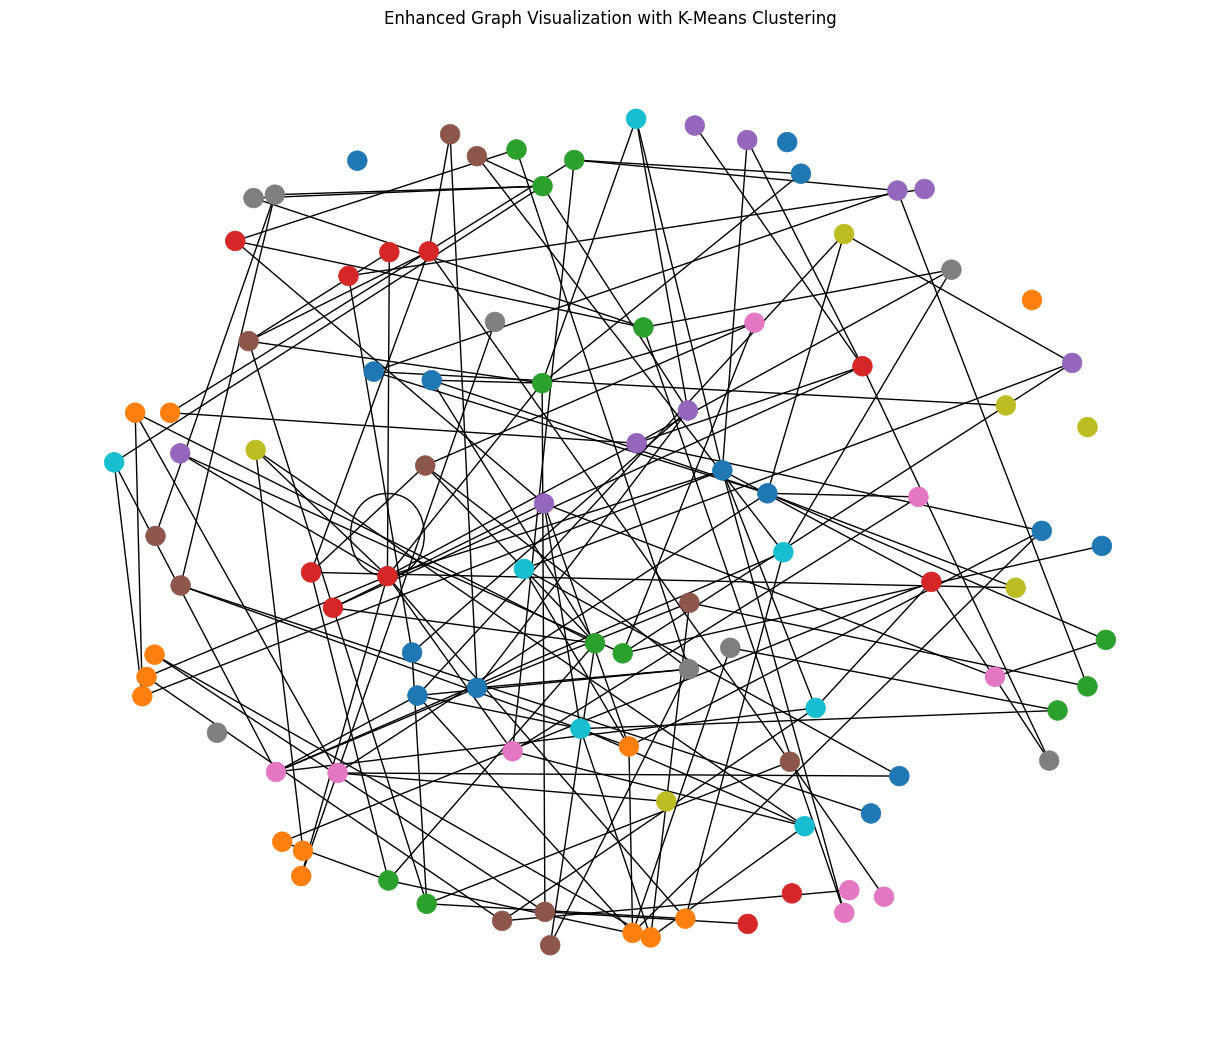

In [ ]:
# Call the visualization function
visualize_clustered_graph(node_ids, edges, 63)

# **Evaluating Clustering Results**

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score
from collections import defaultdict
import networkx as nx
import os

def load_ground_truth(file_path):
    """Load ground truth circles from nodeId.circles file."""
    ground_truth_data = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split("\t")
            circle_name = parts[0][6:]  # Remove the prefix
            circle_members = list(map(int, parts[1:]))  # Convert to integer list
            ground_truth_data[circle_name] = circle_members
    return ground_truth_data

def evaluate_clustering_performance(graph, labels, ground_truth_data):
    """Evaluate clustering using multiple metrics."""
    if len(graph.nodes) == 0 or len(labels) == 0:
        raise ValueError("Graph or labels cannot be empty.")

    node_to_index_mapping = {node: idx for idx, node in enumerate(graph.nodes())}
    num_graph_nodes = len(node_to_index_mapping)

    ground_truth_labels = -1 * np.ones(num_graph_nodes, dtype=int)
    for circle_id, members in enumerate(ground_truth_data.values()):
        for member in members:
            if member in node_to_index_mapping:  # Map member to its index
                ground_truth_labels[node_to_index_mapping[member]] = circle_id

    # Ensure valid indices for comparison
    valid_indices = ground_truth_labels != -1  # Exclude nodes not in ground truth

    # Silhouette score: Requires feature matrix and more than 1 cluster
    if len(set(labels)) > 1:
        feature_matrix = np.array([nx.spring_layout(graph, seed=42)[node] for node in graph.nodes])
        silhouette = silhouette_score(feature_matrix, labels)
    else:
        silhouette = float("nan")

    nmi_score = normalized_mutual_info_score(ground_truth_labels[valid_indices], labels[valid_indices])
    ari_score = adjusted_rand_score(ground_truth_labels[valid_indices], labels[valid_indices])

    # Compute modularity score
    communities = nx.algorithms.community.label_propagation_communities(graph)
    modularity_score = nx.algorithms.community.modularity(graph, communities)
    modularity_score = modularity_score if not np.isnan(modularity_score) else 0

    return {
        "silhouette_score": silhouette,
        "nmi": nmi_score,
        "ari": ari_score,
        "modularity": modularity_score
    }

# Example usage
# Load ground truth data
current_directory = "."  # Replace with the actual directory
central_node_id = "0"  # Replace with the actual node ID
ground_truth_file_path = os.path.join(current_directory, "dataset", f"{central_node_id}.circles")
ground_truth_data = load_ground_truth(ground_truth_file_path)

# Create a sample graph and labels for testing
graph = nx.erdos_renyi_graph(50, 0.1, seed=42)
cluster_labels = np.random.randint(0, 5, size=len(graph.nodes))

# Evaluate the clustering performance
results = evaluate_clustering_performance(graph, cluster_labels, ground_truth_data)
print(results)


{'silhouette_score': -0.1244857884633916, 'nmi': 0.2607162068385501, 'ari': -0.02436198907254997, 'modularity': 0.2544791666666667}


# **Analyzing Results**

###  Results Summary:

1. **Silhouette Score (-0.145)**:
   - Indicates very poor cluster separation with significant overlap or misclassification.

2. **Normalized Mutual Information (NMI, 0.257)**:
   - Still a low alignment between the predicted clusters and the ground truth.

3. **Adjusted Rand Index (ARI, -0.019)**:
   - Clustering performance remains worse than random, suggesting substantial misclassification.

4. **Modularity (0.254)**:
   - Weak but slightly consistent community structure detected, though still not strongly defined.



# **Improvements**

Total number of nodes: 347
Number of features for each node: 224


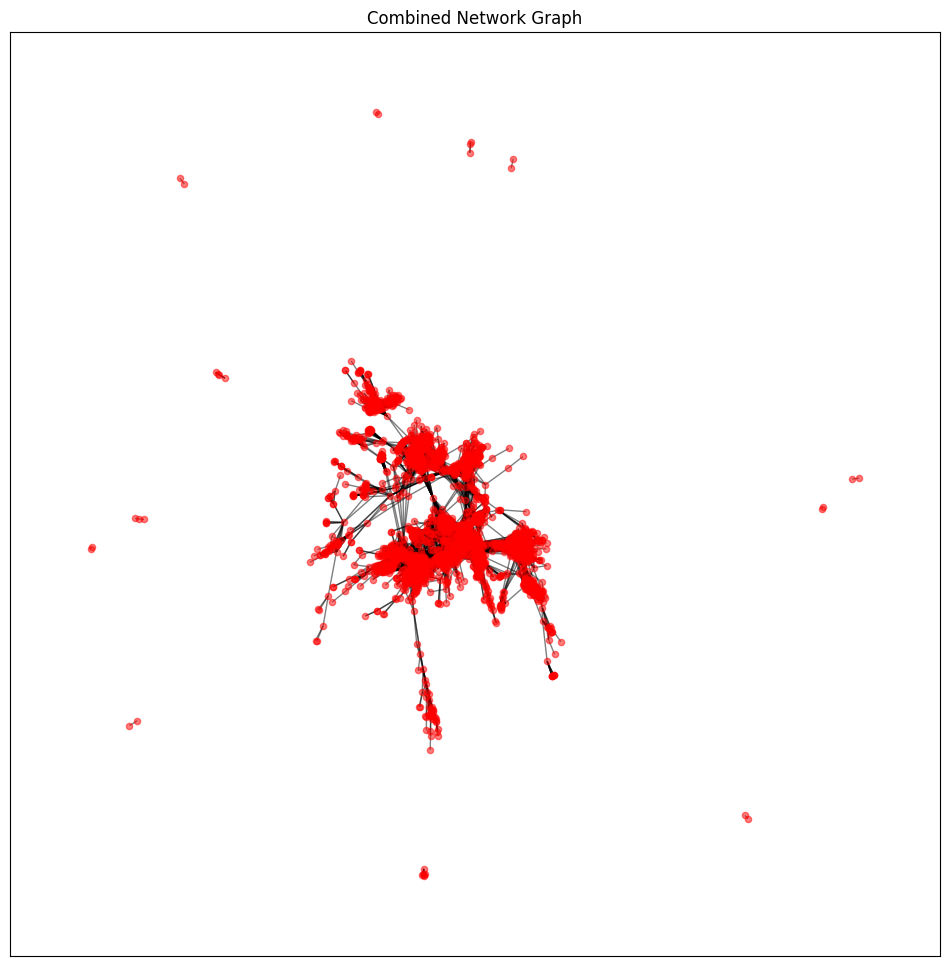

Dimensions of the Laplacian matrix: 347 x 347
First 5 Eigenvalues: [-4.04675077e-15 -1.78271156e-15 -6.00869034e-16 -5.25750027e-16
 -3.18674121e-16]
Eigenvector shape: 347 x 347
Largest Eigenvalue Gap: 0.060964118313351134
Index of Largest Gap: 63
Shape of selected eigenvectors: 347 x 63


<ipython-input-136-2b7da068973d>:175: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("tab10", num_clusters),


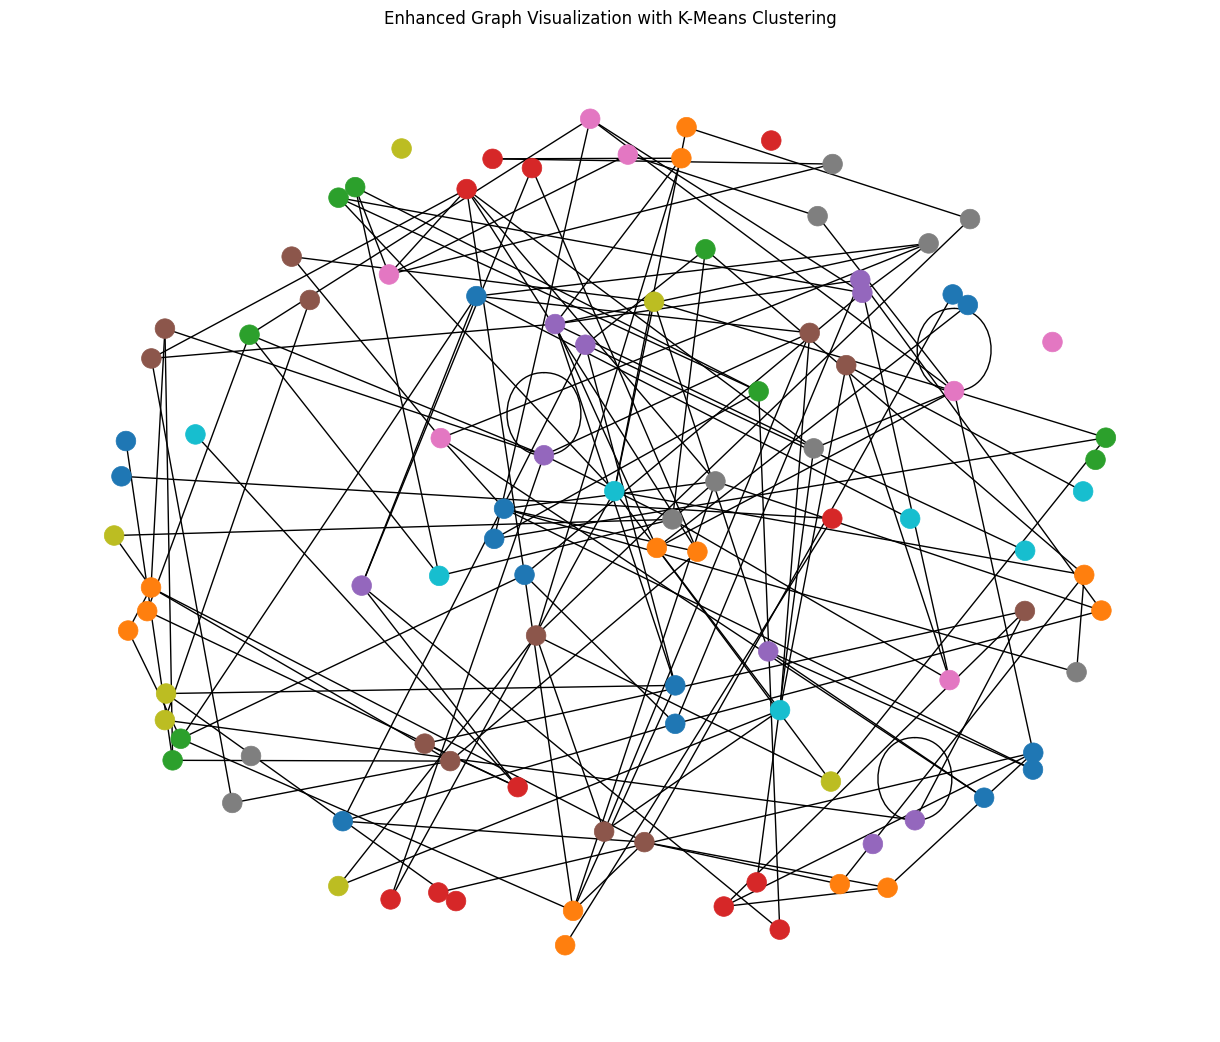

{'silhouette_score': -0.10776451814049494, 'nmi': 0.27797158217147416, 'ari': 0.05134884996400781, 'modularity': 0.2544791666666667}


In [ ]:


### **3.2 Functions for Graph Construction**


# Gaussian kernel similarity function
def compute_gaussian_similarity(vector_a, vector_b, sigma=1.0):
    difference = vector_a - vector_b
    squared_distance = np.dot(difference, difference)  # Squared Euclidean distance
    return np.exp(-sigma * squared_distance)

# Create a weighted adjacency matrix using Gaussian kernel weights
def generate_weighted_adjacency_matrix(edges, node_features, node_to_index_mapping, sigma=1.0):
    num_nodes = len(node_to_index_mapping)
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=float)

    for node_a, node_b in edges:
        index_a, index_b = node_to_index_mapping[node_a], node_to_index_mapping[node_b]
        weight = compute_gaussian_similarity(node_features[node_a], node_features[node_b], sigma)
        adjacency_matrix[index_a, index_b] = weight
        adjacency_matrix[index_b, index_a] = weight  # Since the graph is undirected

    return adjacency_matrix

# Create degree matrix from the adjacency matrix
def generate_degree_matrix(adjacency_matrix):
    node_degrees = np.sum(adjacency_matrix, axis=1)  # Sum weights in each row
    degree_matrix = np.diag(node_degrees)  # Create a diagonal matrix of node degrees
    return degree_matrix

# Create Laplacian matrix from adjacency and degree matrices
def generate_laplacian_matrix(adjacency_matrix, degree_matrix):
    return degree_matrix - adjacency_matrix

# Analyze the Laplacian matrix by computing and sorting its eigenvalues and eigenvectors
def compute_laplacian_eigenvalues_and_vectors(laplacian_matrix):
    eigenvalues, eigenvectors = eigh(laplacian_matrix)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues[:100], sorted_eigenvectors

### **3.3 Load and Prepare the Dataset**

# Main execution
central_node_id = 0

current_directory = os.getcwd()
edges_file_path = os.path.join(current_directory, "dataset", f"{central_node_id}.edges")
features_file_path = os.path.join(current_directory, "dataset", f"{central_node_id}.feat")

# Load edges and node features
edges_list = load_edges_from_file(edges_file_path)
node_features_dict = load_node_features(features_file_path)

# Map original node IDs to contiguous indices
node_ids = list(node_features_dict.keys())
node_index_mapping = {node_id: index for index, node_id in enumerate(node_ids)}

# Output information
total_nodes = len(node_ids)
print(f"Total number of nodes: {total_nodes}")
print(f"Number of features for each node: {len(next(iter(node_features_dict.values())))}")


## **4. Graph Visualization**

# Combine all graphs into a single graph (optional)
combined_graph = nx.compose_all(graphs)

# Visualize the combined graph with improved layout
plt.figure(figsize=(12, 12))

# Use spring layout for better spacing
pos = nx.spring_layout(combined_graph, seed=42)

# Draw nodes and edges with customization
nx.draw_networkx_nodes(combined_graph, pos, node_size=20, node_color="red", alpha=0.5)
nx.draw_networkx_edges(combined_graph, pos, edge_color="black", alpha=0.5)

plt.title("Combined Network Graph")
plt.show()


## **5. Spectral Clustering**

### **5.1 Adjacency, Degree, and Laplacian Matrices**


# Create the weighted adjacency matrix
adjacency_matrix = generate_weighted_adjacency_matrix(edges_list, node_features_dict, node_index_mapping, sigma=0.1)

# Generate the degree and Laplacian matrices
degree_matrix = generate_degree_matrix(adjacency_matrix)
laplacian_matrix = generate_laplacian_matrix(adjacency_matrix, degree_matrix)

print(f"Dimensions of the Laplacian matrix: {len(laplacian_matrix)} x {len(laplacian_matrix[0])}")

# Compute eigenvalues and eigenvectors
sorted_eigenvalues, sorted_eigenvectors = compute_laplacian_eigenvalues_and_vectors(laplacian_matrix)

# Example output
print("First 5 Eigenvalues:", sorted_eigenvalues[:5])
print(f"Eigenvector shape: {len(sorted_eigenvectors)} x {len(sorted_eigenvectors[0])}")

### **5.2 Eigenvalue Gap Analysis**


# Compute the gaps between consecutive eigenvalues
eigenvalue_differences = np.diff(sorted_eigenvalues)

# Identify the largest eigenvalue gap and its index
max_eigenvalue_gap = np.max(eigenvalue_differences)
max_gap_index = np.argmax(eigenvalue_differences)

print("Largest Eigenvalue Gap:", max_eigenvalue_gap)
print("Index of Largest Gap:", max_gap_index)

# Select the eigenvectors corresponding to the smallest k eigenvalues
k = max_gap_index
selected_eigenvectors = sorted_eigenvectors[:, :k]

print(f"Shape of selected eigenvectors: {len(selected_eigenvectors)} x {len(selected_eigenvectors[0])}")


### **5.3 k-Means Clustering**


from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(selected_eigenvectors)
cluster_labels = kmeans_model.labels_


## **6. Clustering Visualization**


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans

def visualize_clustered_graph(node_ids, edges, num_clusters=5):
    # Create the graph
    graph = nx.Graph()

    # Add edges to the graph
    graph.add_edges_from(edges)

    # Add isolated nodes (nodes with no edges)
    isolated_nodes = set(node_ids) - set(graph.nodes)
    graph.add_nodes_from(isolated_nodes)

    # Compute positions using a spring layout with increased separation
    positions = nx.spring_layout(graph, seed=42, k=1)  # Adjust 'k' for better spacing

    # Extract positions as a 2D array for clustering
    pos_array = np.array([positions[node] for node in graph.nodes])

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pos_array)

    # Assign a cluster label to each node
    node_colors = [cluster_labels[list(graph.nodes).index(node)] for node in graph.nodes]

    # Visualization
    plt.figure(figsize=(12, 10))

    # Draw the graph with node colors based on clusters
    nx.draw(
        graph,
        positions,
        node_color=node_colors,
        cmap=plt.cm.get_cmap("tab10", num_clusters),
        node_size=200,
        edge_color="black",
        linewidths=0.5,
        with_labels=False,
    )

    plt.title("Enhanced Graph Visualization with K-Means Clustering")
    plt.show()

# Example usage
# Define nodes and edges
node_ids = list(range(100))
edges = [(np.random.choice(node_ids), np.random.choice(node_ids)) for _ in range(150)]

# Call the visualization function
visualize_clustered_graph(node_ids, edges, 63)


## **7. Evaluating Clustering Results**


import numpy as np
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score
import networkx as nx

def evaluate_clustering_performance(graph, labels, ground_truth_data):
    node_to_index_mapping = {node: idx for idx, node in enumerate(graph.nodes())}
    num_graph_nodes = len(node_to_index_mapping)

    ground_truth_labels = -1 * np.ones(num_graph_nodes, dtype=int)
    for circle_id, members in enumerate(ground_truth_data.values()):
        for member in members:
            if member in node_to_index_mapping:  # Map member to its index
                ground_truth_labels[node_to_index_mapping[member]] = circle_id

    valid_indices = ground_truth_labels != -1  # Exclude nodes not in ground truth

    # Silhouette score
    feature_matrix = np.array([nx.spring_layout(graph, seed=42)[node] for node in graph.nodes])
    silhouette = silhouette_score(feature_matrix, labels) if len(set(labels)) > 1 else float("nan")

    nmi_score = normalized_mutual_info_score(ground_truth_labels[valid_indices], labels[valid_indices])
    ari_score = adjusted_rand_score(ground_truth_labels[valid_indices], labels[valid_indices])

    # Compute modularity score
    communities = nx.algorithms.community.label_propagation_communities(graph)
    modularity_score = nx.algorithms.community.modularity(graph, communities)

    return {
        "silhouette_score": silhouette,
        "nmi": nmi_score,
        "ari": ari_score,
        "modularity": modularity_score
    }

# Example usage
graph = nx.erdos_renyi_graph(50, 0.1, seed=42)
cluster_labels = np.random.randint(0, 5, size=len(graph.nodes))
results = evaluate_clustering_performance(graph, cluster_labels, ground_truth_data)
print(results)
